<a href="https://colab.research.google.com/github/maxashoka3/Machine-learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


###### *Reading dataset from google drive*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA project - airbnb/Copy of Airbnb NYC 2019.csv')

## Understanging Dataset



In [ ]:
df.shape

(48895, 15)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Checking Categorical values and numerical values



In [ ]:
#checking object type
list(df.select_dtypes(include = 'object').columns)

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [ ]:
#checking other type 
list(df.select_dtypes(exclude = 'object').columns)

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Understanding the relation between 

1.   Id
2.   Name
3.   host_id
4.   host name
5.   Hosting name





#### Checking unique value

checking duplicate value 

In [ ]:
df['id'].duplicated().sum()

0

In [ ]:
df['name'].duplicated().sum()
#means therea are serveral hotel name with same name 

989

In [ ]:
#checking duplication value in host_id

df['host_id'].duplicated().sum()

11438

In [ ]:
df['host_name'].nunique()

11452

In [ ]:
df['host_name'].duplicated().sum()

37442

**We can say that that host id and 
host name have duplicate value
 But we cannot remove it**

In [ ]:
# calculated hosting name,airbnb name and host_name relaiton

In [ ]:
df[df['host_name'] ==df['name']].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90


In [ ]:
df[df['host_name'] ==df['name']].value_counts

<bound method DataFrame.value_counts of              id  ... availability_365
9473    7264659  ...               25
10682   8212051  ...              238
16422  13186374  ...                0
23996  19348168  ...                0
24152  19456810  ...               90
24607  19785737  ...              180
26734  21231543  ...              365
26752  21243952  ...              365
26753  21244035  ...              365
26889  21311903  ...              365
26891  21312075  ...              365
26892  21312191  ...              365
26893  21312225  ...              365
26894  21312283  ...              355
26895  21312330  ...              355
26896  21312403  ...              362
26897  21312440  ...              360
26898  21312495  ...              362
26899  21312549  ...              355
26900  21312595  ...              355
26901  21312687  ...              319
26902  21312732  ...              309
27186  21488093  ...                0
33964  26895166  ...               32
43564  337

**Note** : 26 hotel and host name are same

In [95]:
df[['host_name','name']].isnull().values.any()

True

We have found out that there are several hotels and their owner name which are same and even have duplicate value in them. So we need to check whether the duplicate name in host name are same same person or different person

In [ ]:
df.loc[df['host_name'] == 'John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [ ]:
# so we can see from the table that we have 294 values of John and we can also observe that this table have different host_id 
#which implies that we have different john
df[df['host_name'] == 'John']['name'].nunique()

293

In [ ]:
#checking different John values with calulated_host_listing_count
df.loc[df['host_id'] == 715807]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0


In [ ]:
#this John of id 715807 have only one caluclated_host_listing_count 

In [ ]:
#df['reviews_per_month'].isna().any()
#df[['host_name','name']].isnull().any()

In [ ]:
df.loc[df['host_id'] == 715807]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0


In [ ]:
df.loc[df['host_id'] ==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


This John with id 2787 has 6 properties with different name and situtated in 

different heignboorhood. 

**Top 10 host**

In [92]:
df[['host_id','host_name']].value_counts()[:10]

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
12243051   Sonder                96
16098958   Jeremy & Laura        96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
dtype: int64

In [94]:
df['host_id'].value_counts()[:10]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
# so this is code doesnt give us the exact top 10 host name but the most repetative name
df['host_name'].value_counts()[:5]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [ ]:
 df[df['name']=='New york Multi-unit building'].head(4)

In [ ]:
df[df['name']=='New york Multi-unit building'].head(4)

In [ ]:
df.loc[(df['neighbourhood_group']=='Manhattan') & (df['host_name']=='Natasha')]

In [ ]:
df['neighbourhood'].nunique()

221

In [ ]:
df['host_name'].value_counts()[:5]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
# 11 files with 0 price 
len(df[df['price']== 0]) 

11

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


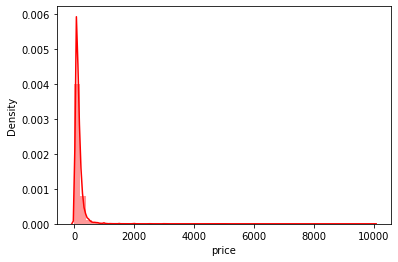

In [ ]:
sns.distplot(df['price'], hist = True,color ='r')

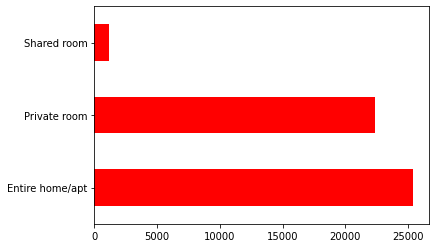

In [ ]:
df["room_type"].value_counts().plot(kind ='barh',color ='r' )

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


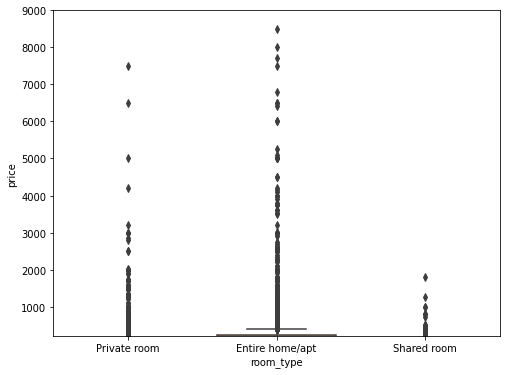

In [ ]:
import matplotlib.pyplot as plt
data = pd.concat([df['price'], df['room_type']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='room_type', y="price", data=data)
fig.axis(ymin=200, ymax=9000);

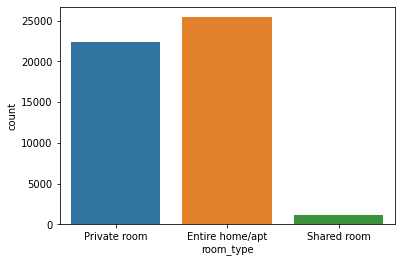

In [ ]:
fig = sns.countplot(x='room_type', data=df)

In [ ]:
#fig = sns.countplot(x='neighbourhood_group', data=data)
df['neighbourhood_group'].nunique()

5

In [ ]:
#var = 'neighbourhood_group'
##f, ax = plt.subplots(figsize=(16, 8))
#fig = sns.boxplot(x=var, y="price", data=df)
#fig.axis(ymin=0, ymax= 400
         
 #        );
#plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


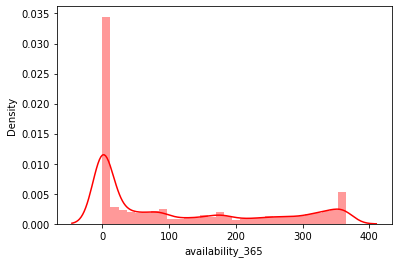

In [ ]:
sns.distplot(df['availability_365'], hist = True,color ='r')

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


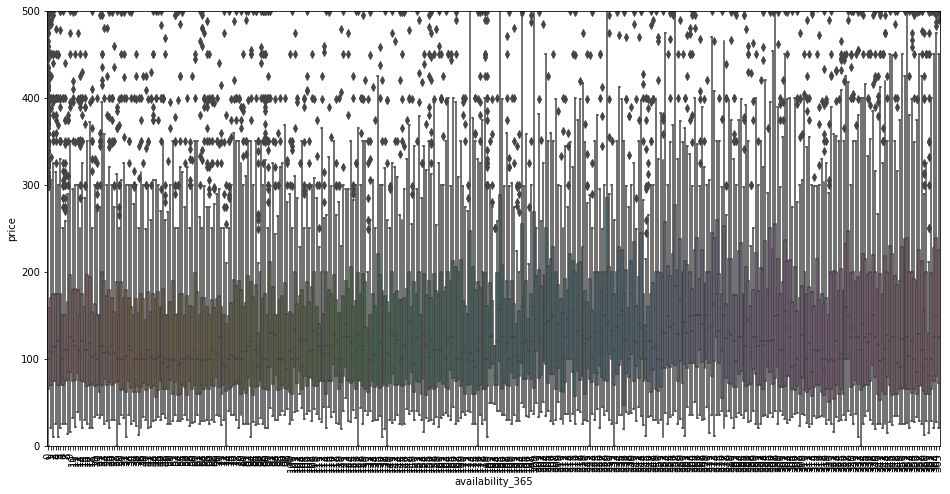

In [ ]:
var = 'availability_365'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=500);
plt.xticks(rotation=90);

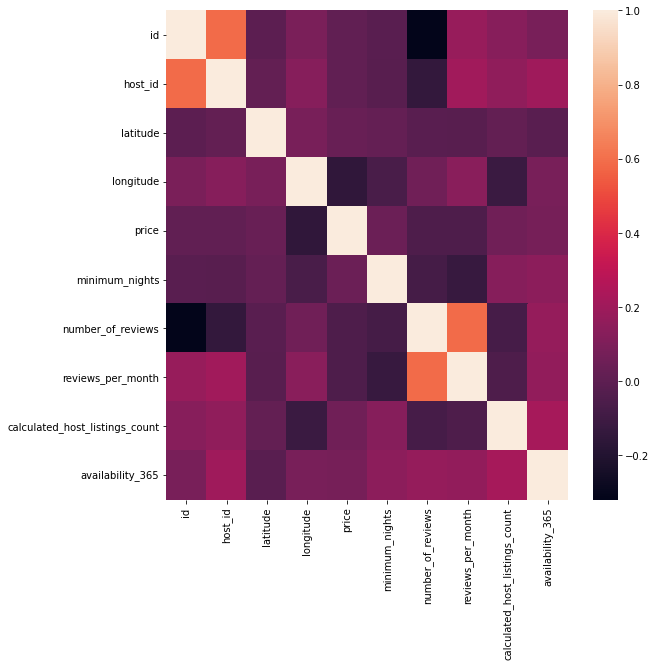

In [ ]:
#correlation
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat);

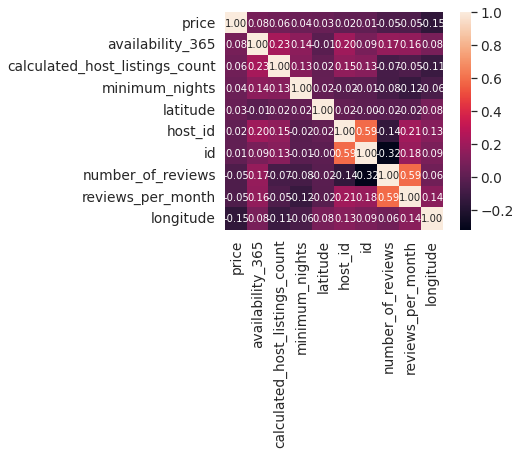

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Dealing with null values

In [ ]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = True,cmap = 'viridis')

In [ ]:
df.drop('last_review',axis = 1 ,inplace = True)

In [ ]:
#replacing Nan values with 0 in reviews_per_month
df.fillna({'reviews_per_month':0}, inplace=True)


In [ ]:
df['name'].fillna('unknown',inplace = True)
df['host_name'].fillna('unknown_host',inplace =True)
df[['host_name']].isnull().any()

host_name    False
dtype: bool

In [ ]:
df[['name']].isnull().any()

name    False
dtype: bool

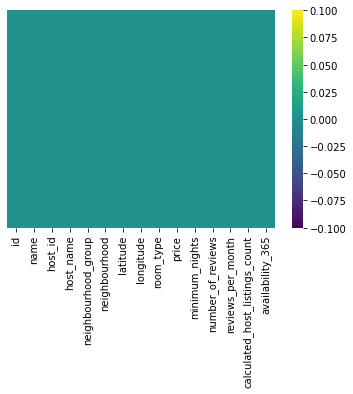

In [ ]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [ ]:
df.isnull().values.sum()

0

# We have completly removed null values


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


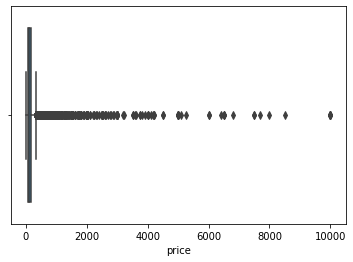

In [ ]:
sns.boxplot(df['price'])

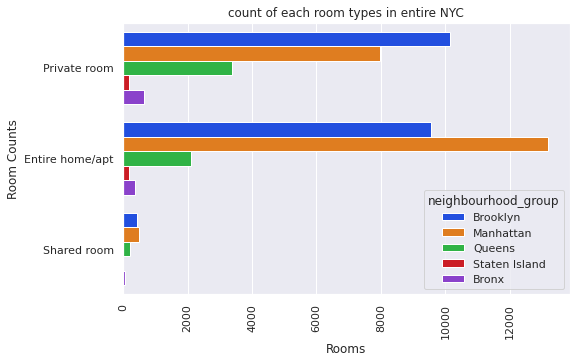

In [ ]:
#plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')



plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

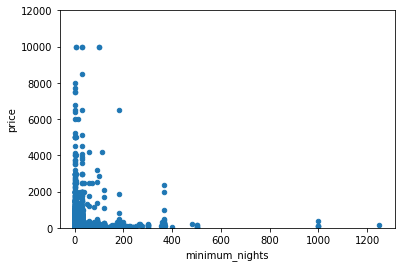

In [ ]:
# #price vs minimum night
df.plot.scatter(x='minimum_nights',y = 'price',ylim = (0,12000))

In [ ]:
#checking duplicate data
df[df['name'] == df['host_name']]

In [ ]:
from pandas.core.algorithms import duplicated
#checking duplicate rows
df.duplicated().sum()


0

## Finding Top Hotel

In [ ]:
#finding top 5 hotel
listing_count_df = df['name'].value_counts()[:5]
listing_count_df


Hillside Hotel                  18
Home away from home             17
New york Multi-unit building    16
Brooklyn Apartment              12
Private Room                    11
Name: name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

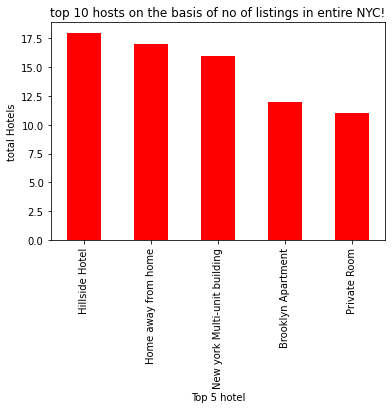

In [ ]:
listing_count_df.plot(kind='bar',color='r')
plt.xlabel('Top 5 hotel')
plt.ylabel('total Hotels')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')


### Top 10 hosts

In [ ]:
top_host = df['host_name'].value_counts()[:10]
top_host

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

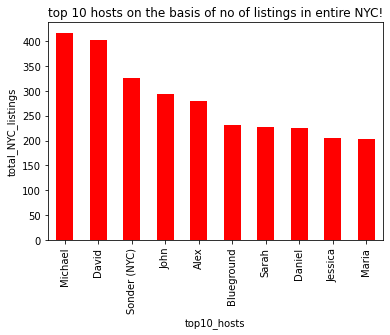

In [ ]:
top_host.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listing!')

# Top 10 neiighborhood





Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count')

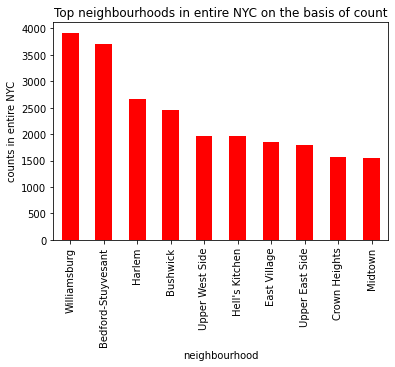

In [ ]:
top_10_neigbours= df['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count')

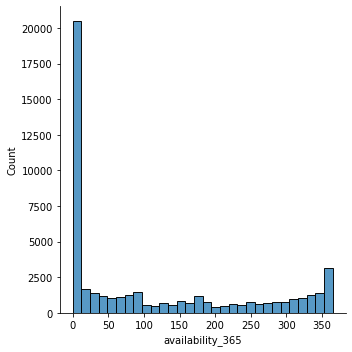

In [ ]:
#distribution of listings availability at NYC!
sns.displot(df['availability_365'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


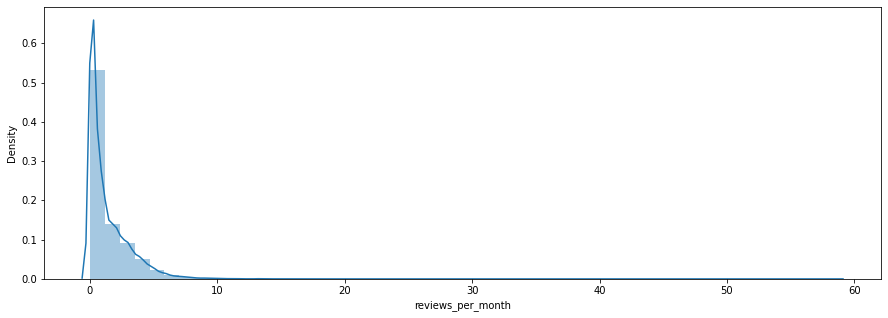

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['reviews_per_month'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['reviews_per_month'].skew())
print("Kurtosis: %f" % df['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large no of outliers



Skewness: 3.130189
Kurtosis: 42.493469


## Handling Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


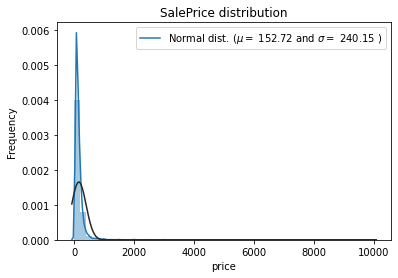

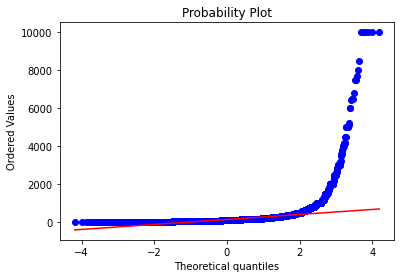

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['price'] , fit=norm);

(mu, sigma) = norm.fit(df['price'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


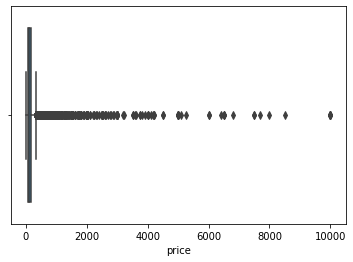

In [ ]:
sns.boxplot(df['price'])

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## IQR for removing outliers

In [ ]:
q1 =df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 -q1
IQR

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.540000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64

In [ ]:
#defing outlier function
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.percentile(col , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
 
  return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = remove_outlier(df['price'])

In [ ]:
df1 = df[(df.price >lower_bound) & (df.price < upper_bound)]

In [ ]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


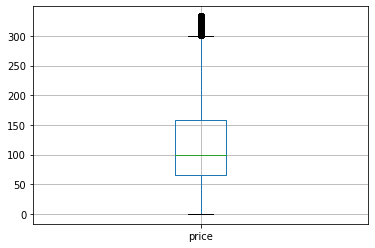

In [ ]:
df1.boxplot(column='price')

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df1['price'].skew())
print("Kurtosis: %f" % df1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


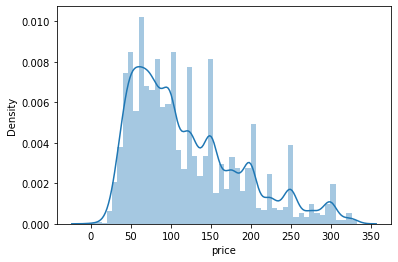

In [ ]:
sns.distplot(df1['price'])

In [ ]:
df1.shape

(45918, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 119.95 and sigma = 68.12



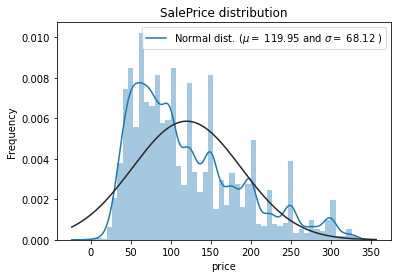

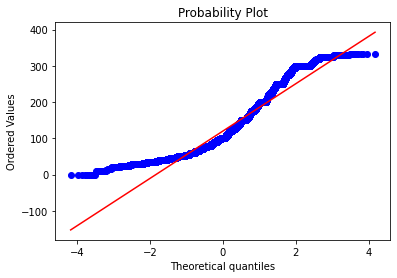

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df1['price'] , fit=norm);

(mu, sigma) = norm.fit(df1['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['price'], plot=plt)
plt.show()

## Bi Variate Analysis

#### neighboor_group vs Price

In [ ]:
df1['neighbourhood_group'].nunique()

5

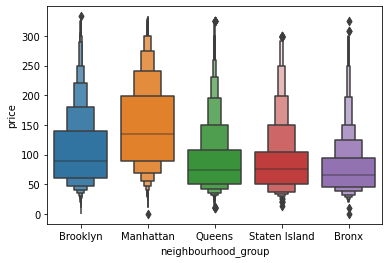

In [ ]:
ax= sns.boxenplot(x='neighbourhood_group',y='price',data=df1)

### expensive vs cheapest

In [ ]:
# expensive
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
df1.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Cullen,Entire home/apt
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Adam,Entire home/apt
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Fatima,Private room
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Mel,Entire home/apt
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Rated,Entire home/apt


In [ ]:
df.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,Kimberly,Private room


### Top neignbourhood with respect to average price / day 

In [ ]:
p1 = df1['price'].mean()
p1

119.94701424278061

In [ ]:
df_ngrp= df1.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [ ]:
df_ngrp

,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,78.756098
1,Bronx,Baychester,75.428571
2,Bronx,Belmont,77.125000
3,Bronx,Bronxdale,57.105263
4,Bronx,Castle Hill,63.000000
...,...,...,...
214,Staten Island,Tompkinsville,76.190476
215,Staten Island,Tottenville,144.857143
216,Staten Island,West Brighton,80.555556
217,Staten Island,Westerleigh,71.500000


In [ ]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,212.495327
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Text(0, 0.5, 'price')

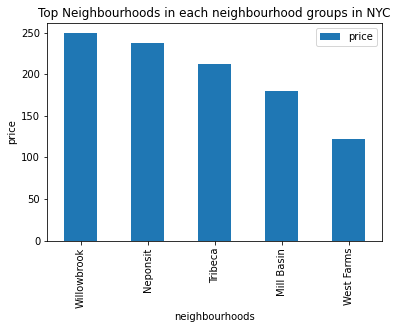

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

In [ ]:
#costliest listings in each neighbourhood groups
costliest_df= df.loc[df.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]


In [ ]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Queens,Kathrine,10000
22353,Victorian Film location,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Bronx,Kathy,2500


In [ ]:
#cheapest
#cheapest listings in each neighbourhood groups
cheapest_df= df1.loc[df1.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
25433,Bronx,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,0
23161,Brooklyn,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,0
26259,Manhattan,the best you can find,Qiuchi,0
22835,Queens,IT'S SIMPLY CONVENIENT!,Maria,10
45646,Staten Island,Happy Home 3,Raquel,13


### Room_types vs price vs neignbourhood groups

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

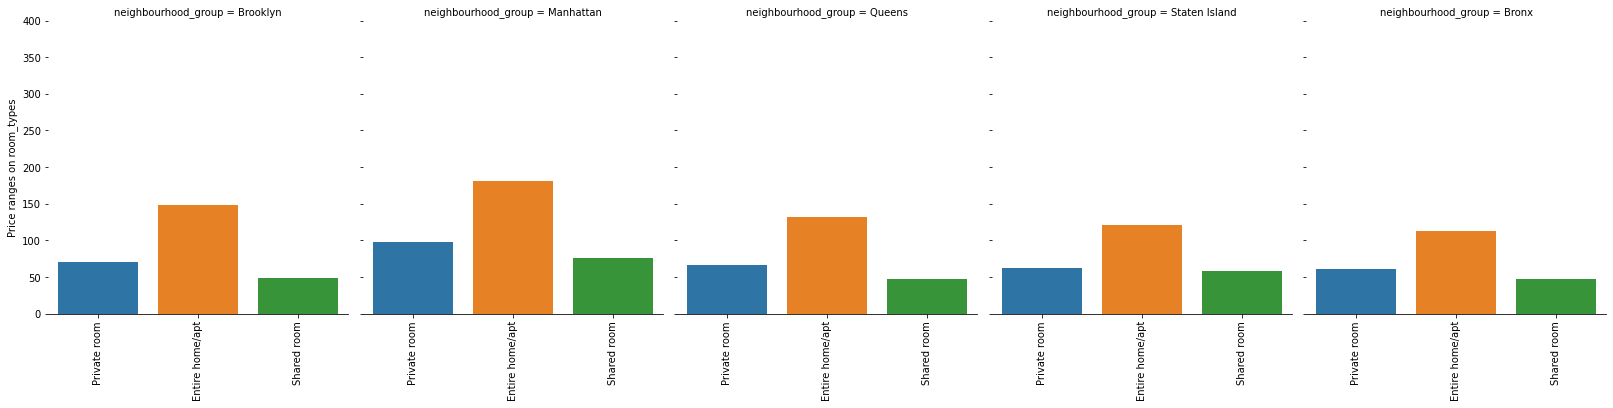

In [ ]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df1, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

Text(0, 0.5, 'Min Stays')

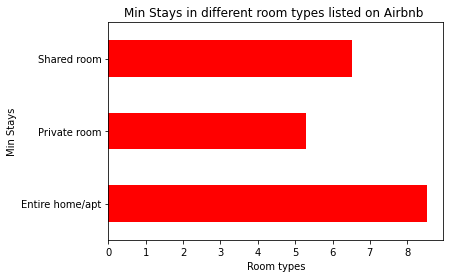

In [ ]:
# min_night= df_air_pnw['room_type']
df1.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')


In [ ]:
#reviews
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df1.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]


,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

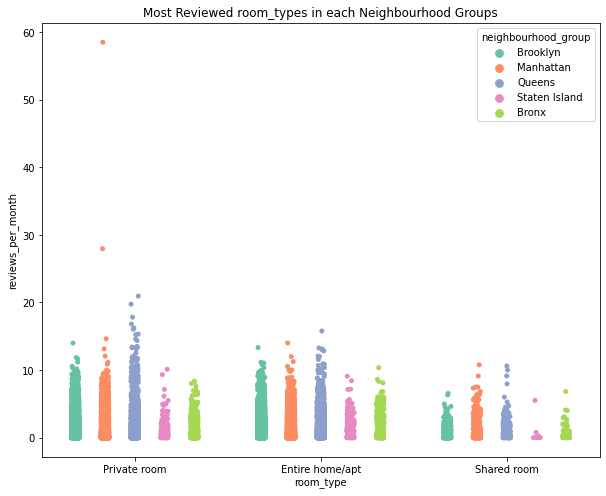

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',
                  y='reviews_per_month',
                  hue='neighbourhood_group',dodge=True,
                  data=df,palette='Set2')
ax.set_title(
    'Most Reviewed room_types in each Neighbourhood Groups')

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

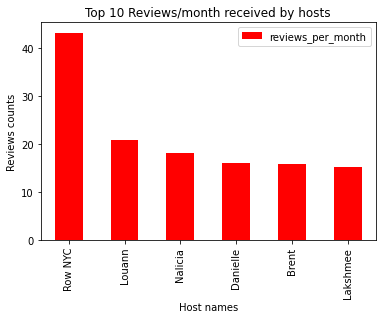

In [ ]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

In [ ]:
host_with_most_listings= df1.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
12738,Sonder (NYC),Manhattan,88944
1766,Blueground,Manhattan,40368
7032,Kara,Manhattan,11523
12737,Sonder,Manhattan,9120
6322,Jeremy & Laura,Manhattan,8640
2803,Corporate Housing,Manhattan,8281
7231,Kazuya,Queens,8137
7295,Ken,Manhattan,7498
9532,Mike,Manhattan,2815
11001,Pranjal,Manhattan,2795


In [ ]:
#most rich neighbor
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)


,host_name,neighbourhood_group,calculated_host_listings_count
12738,Sonder (NYC),Manhattan,88944
7231,Kazuya,Queens,8137
13913,Vida,Brooklyn,2705
13916,Vie,Bronx,156
657,Amarjit S,Staten Island,64


In [ ]:
#room_type and their relation with availability in different groups

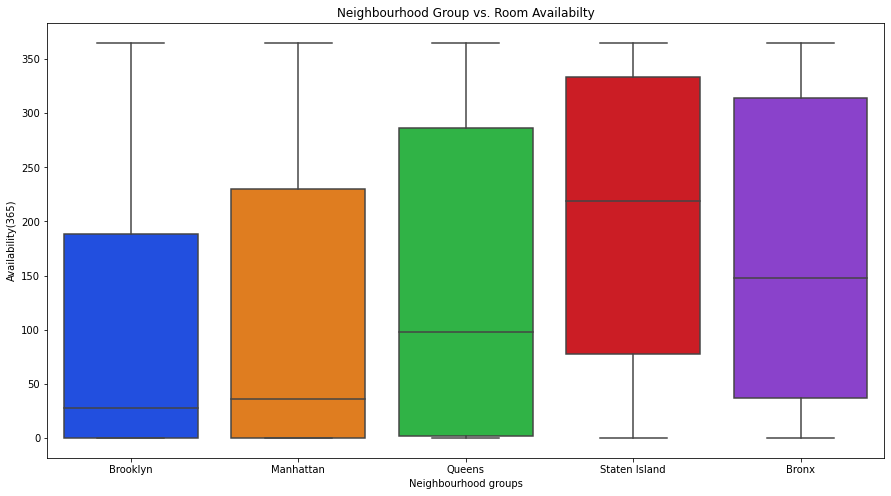

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

## Latitude and longitude


Text(0.5, 1.0, 'Location Co-ordinates')

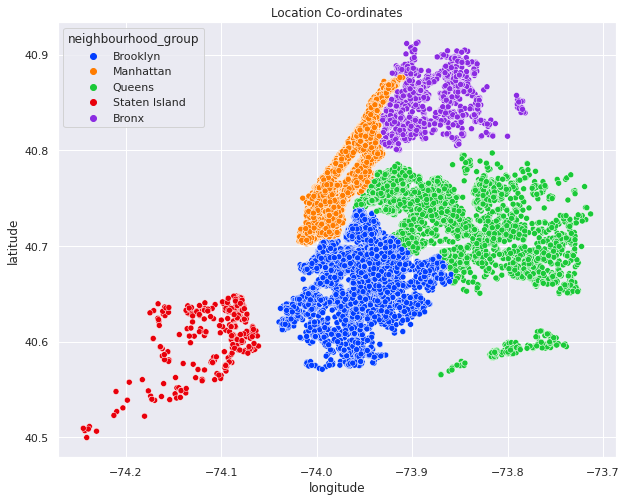

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

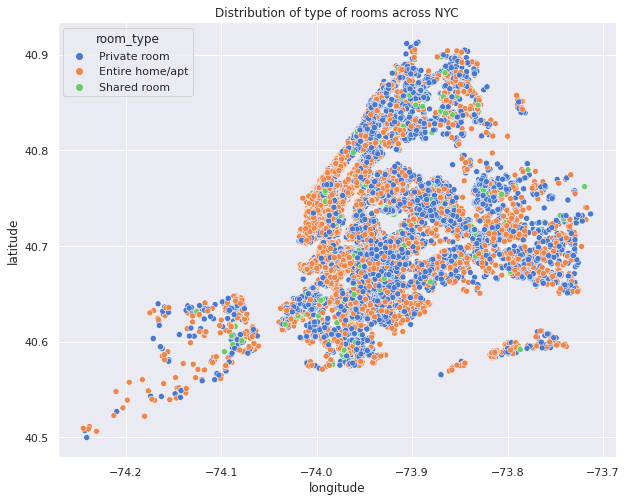

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,
                    palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

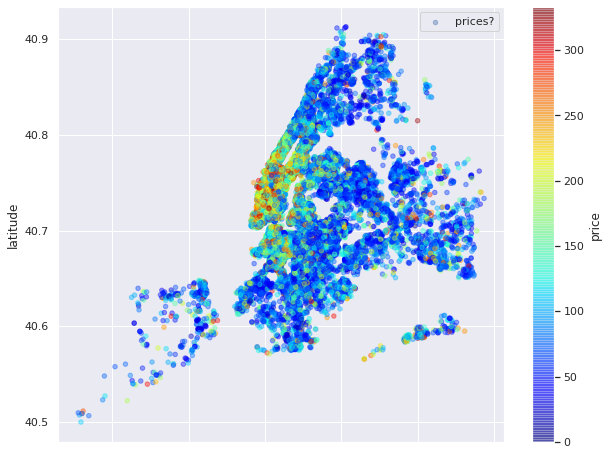

In [ ]:
lat_long=df1.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
lat_long.legend()

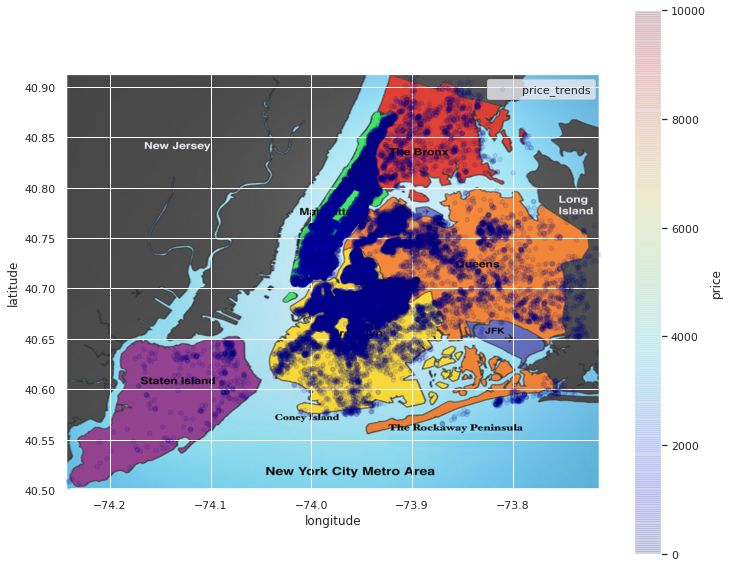

In [ ]:
import matplotlib
plt.figure(figsize=(12,10))
img=matplotlib.pyplot.imread('/content/drive/MyDrive/AlmaBetter/6_the-rockaway-penisula-map.jpg.crdownload')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(12,10))
plt.legend()
plt.show()

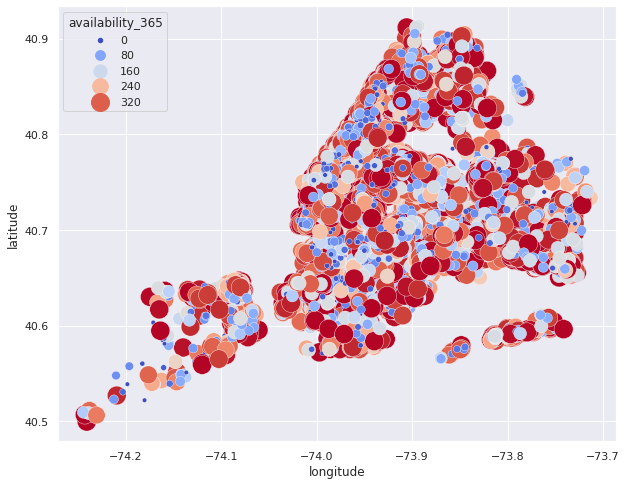

In [ ]:

#img=matplotlib.pyplot.imread('/content/drive/MyDrive/AlmaBetter/6_the-rockaway-penisula-map.jpg.crdownload')
#plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
#ax = plt.gca()
ax=sns.scatterplot(data=df,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',
    sizes=(20,365))

